<a href="https://colab.research.google.com/github/Daivar/Text_generation_LSTM/blob/main/Text_generation_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

##### Dataset from Kaggle https://www.kaggle.com/shivamb/beginners-guide-to-text-generation-using-lstms/data
##### https://towardsdatascience.com/nlp-text-generation-through-bidirectional-lstm-model-9af29da4e520

In [2]:
tokenizer = Tokenizer()
data = open('April/ArticlesApril2017.csv').read()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [3]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [4]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [5]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.1))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 142, 100)          1161200   
                                                                 
 bidirectional (Bidirectiona  (None, 142, 300)         301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 142, 300)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 5806)              586406    
                                                                 
 dense_1 (Dense)             (None, 11612)             67430884  
                                                        

In [8]:
%%time

history = model.fit(predictors, label, batch_size=133, epochs=80, verbose=1)

Epoch 1/80
512/512 [==============================] - 102s 200ms/step - loss: 6.6941 - accuracy: 0.0977
Epoch 2/80
512/512 [==============================] - 102s 199ms/step - loss: 5.5659 - accuracy: 0.2495
Epoch 3/80
512/512 [==============================] - 102s 200ms/step - loss: 5.0265 - accuracy: 0.2979
Epoch 4/80
512/512 [==============================] - 102s 199ms/step - loss: 4.7093 - accuracy: 0.3111
Epoch 5/80
512/512 [==============================] - 101s 198ms/step - loss: 4.4820 - accuracy: 0.3220
Epoch 6/80
512/512 [==============================] - 102s 199ms/step - loss: 4.2970 - accuracy: 0.3327
Epoch 7/80
512/512 [==============================] - 102s 199ms/step - loss: 4.1374 - accuracy: 0.3427
Epoch 8/80
512/512 [==============================] - 102s 199ms/step - loss: 3.9945 - accuracy: 0.3511
Epoch 9/80
512/512 [==============================] - 101s 198ms/step - loss: 3.8556 - accuracy: 0.3598
Epoch 10/80
512/512 [==============================] - 102s 199m

In [12]:
model.save_weights('model_weights', save_format='tf')

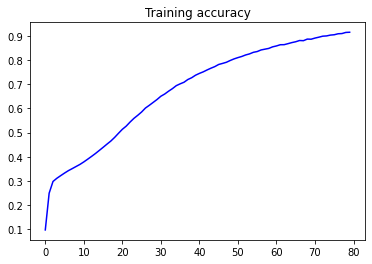

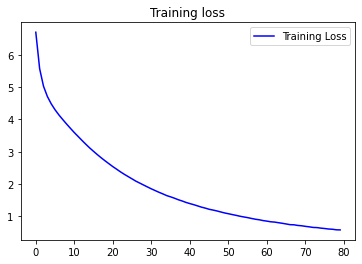

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')  
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
seed_text = "will make America grate again"
next_words = 100

In [ ]:
# after 10 epochs training

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list)[0]
    predicted = np.random.choice([x for x in range(len(predicted_probs))],
                               p=predicted_probs)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

will make America grate again article attack over my food right for korea lives 'united states' tax' 'united states politics and government' 'xi 3 oped 23 2017 04 26 19 38 09 sunday review bro judge would need — killings to not known really help themselves white your raw might state see the new york times blog https lens blogs nytimes com 2017 04 12 nyregion justice he britains trade syria html html html california that greek even our relationship against the supreme it by money recap html html html out with our think weapons their fight not called v milestone the new york times


In [25]:
seed_text = "will make America grate again"
next_words = 20

In [26]:
# after 80 epochs training

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list)[0]
    predicted = np.random.choice([x for x in range(len(predicted_probs))],
                               p=predicted_probs)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

will make America grate again article voters comes to the early vote lines donald party 'united states politics and government' 3 national 19 2017 04


In [23]:
seed_text = "united states"
next_words = 10

In [24]:

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list)[0]
    predicted = np.random.choice([x for x in range(len(predicted_probs))],
                               p=predicted_probs)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

united states by gretchen reynolds article runners live trans fix 400 says
